In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
data = {
    "Начало интервала": [1.5, 1.8, 2.1, 2.4, 2.7, 3.0, 3.3, 3.6, 3.9, 4.2, 4.5],
    "Конец интервала": [1.8, 2.1, 2.4, 2.7, 3.0, 3.3, 3.6, 3.9, 4.2, 4.5, 4.8],
    "Количество": [8, 19, 42, 76, 102, 98, 76, 41, 20, 8, 5]
}

df = pd.DataFrame(data)
df["Середина интервала"] = (df["Начало интервала"] + df["Конец интервала"]) / 2
df["Относительное количество"] = df["Количество"] / df["Количество"].sum()

In [128]:
marks = sorted(list(set([1.5, 1.8, 2.1, 2.4, 2.7, 3.0, 3.3, 3.6, 3.9, 4.2, 4.5] + [1.8, 2.1, 2.4, 2.7, 3.0, 3.3, 3.6, 3.9, 4.2, 4.5, 4.8])))

In [31]:
df

,Начало интервала,Конец интервала,Количество,Середины интервалов
0,1.5,1.8,8,1.65
1,1.8,2.1,19,1.95
2,2.1,2.4,42,2.25
3,2.4,2.7,76,2.55
4,2.7,3.0,102,2.85
5,3.0,3.3,98,3.15
6,3.3,3.6,76,3.45
7,3.6,3.9,41,3.75
8,3.9,4.2,20,4.05
9,4.2,4.5,8,4.35


### Дискретный вариационный ряд

In [109]:
df[["Середина интервала", "Количество"]].T

,0,1,2,3,4,5,6,7,8,9,10
Середина интервала,1.65,1.95,2.25,2.55,2.85,3.15,3.45,3.75,4.05,4.35,4.65
Количество,8.00,19.00,42.00,76.00,102.00,98.00,76.00,41.00,20.00,8.00,5.00


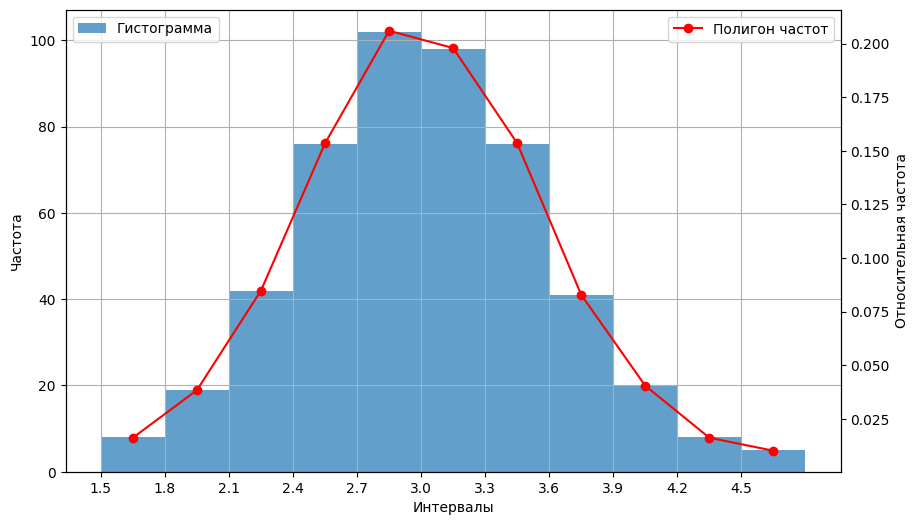

In [112]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(df["Начало интервала"], df["Количество"], width=0.3, alpha=0.7, label="Гистограмма", align="edge")
ax1.legend(loc='upper left')
ax1.grid(True)
ax1.set_xlabel('Интервалы')
ax1.set_ylabel('Частота')

ax2 = ax1.twinx()
ax2.plot(df["Середина интервала"], df["Относительное количество"], marker='o', color='r', label="Полигон частот")
ax2.set_ylabel('Относительная частота')
ax2.legend(loc='upper right')

plt.xticks(df["Начало интервала"])
plt.legend()
plt.show()

In [51]:
mean = (df["Относительное количество"] * df["Середина интервала"]).sum()
print(f"Выборочное среднее: {mean:.4f}")

Выборочное среднее: 3.0161


In [119]:
total_sum = df["Количество"].sum()

variance = (
    (df["Середина интервала"] - mean).pow(2) * df["Относительное количество"]
).sum()

std = np.sqrt(variance)

print(f"Дисперсия: {variance:.4f}")
print(f"Выборочное СКО: {std:.4f}")

Дисперсия: 0.3386
Выборочное СКО: 0.5819


## Доверительный интервал матожидания
$$
mean \pm t_{\alpha/2, \, n-1} \cdot \frac{std}{\sqrt{n}}
$$

альфа = 1 - 0.95 = 0.05

Чтобы узнать $ t_{\alpha/2, \, n-1} $  
по X берем альфа (0.05)  
по Y размер выборки минус 1 (10)  

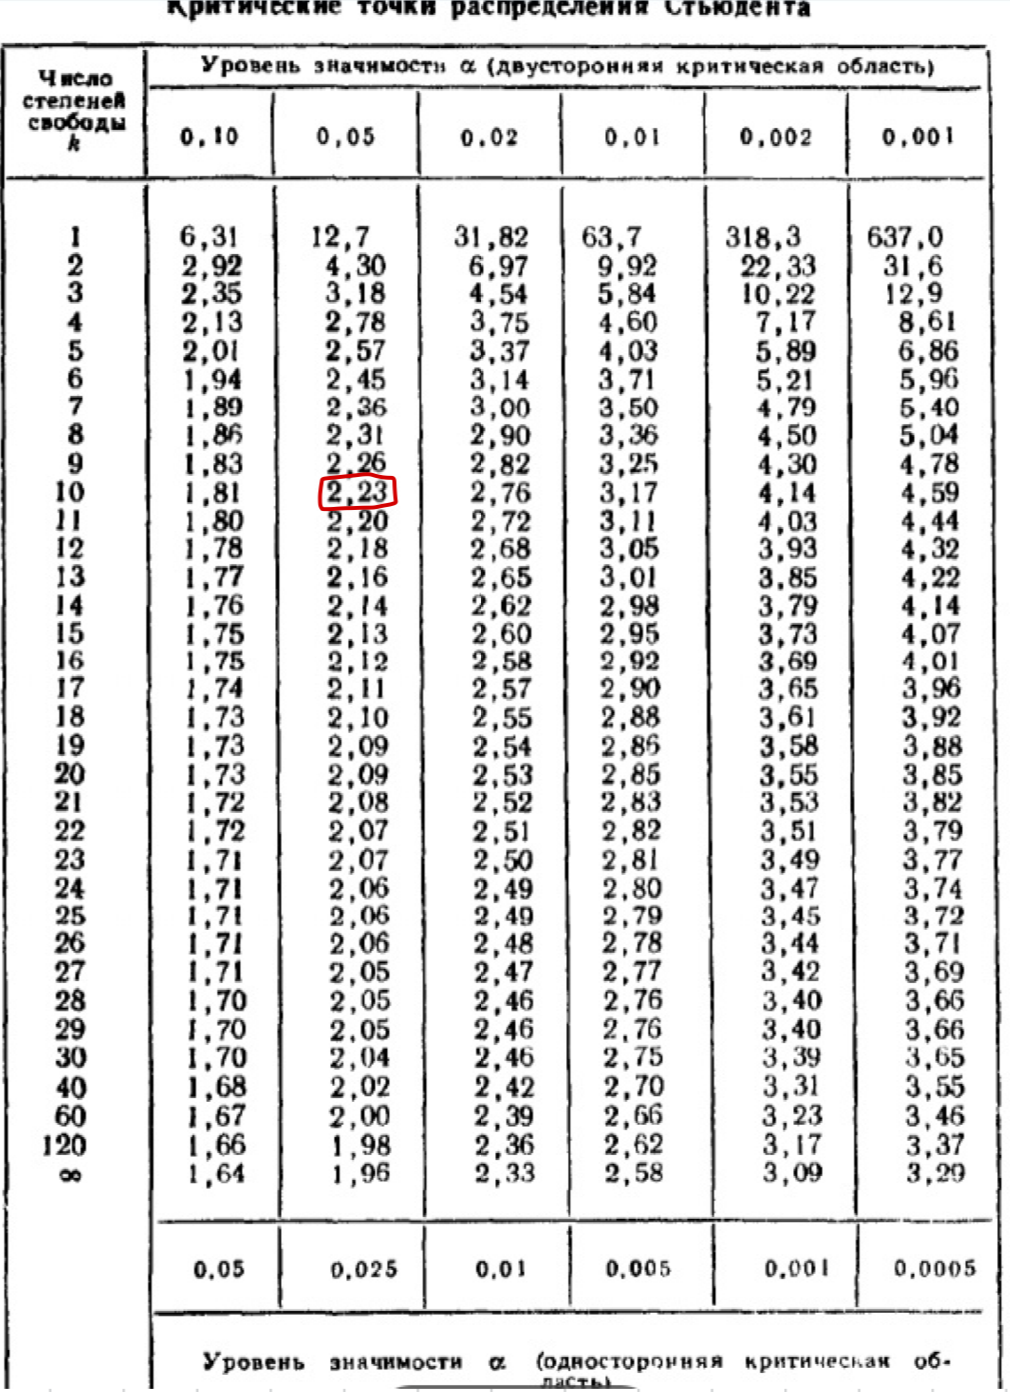

In [124]:
n = len(df) # размер выборки

p = 0.95
alpha = 1 - p
t = 2.23

In [117]:
rng = mean - t * np.sqrt(variance / n), mean + t * np.sqrt(variance / n)
print(f"Доверительный интервал матожидания: ({rng[0]:.4f}, {rng[1]:.4f})")

Доверительный интервал матожидания: (2.6248, 3.4073)


## Доверительный интервал дисперсии

$$
\left( \frac{(n-1)var}{\chi^2_{\alpha/2, \, n-1}}, \frac{(n-1)var}{\chi^2_{1-\alpha/2, \, n-1}} \right)
$$

И из этой таблицы находим числа для $ {\chi_{\alpha/2, \, n-1}} $ и $ {\chi_{1 - \alpha/2, \, n-1}} $  


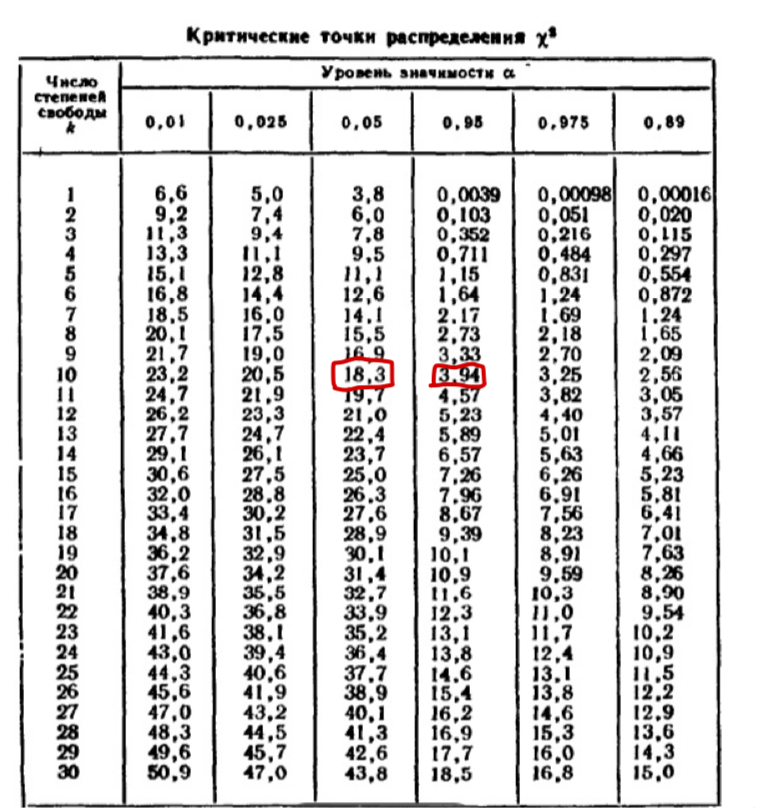

In [123]:
chi_lower, chi_upper = 18.3, 3.94

In [122]:
rng = (n - 1) * variance / (chi_lower), (n - 1) * variance / (chi_upper)
print(f"Доверительный интервал дисперсии: ({rng[0]:.4f}, {rng[1]:.4f})")

Доверительный интервал дисперсии: (0.1850, 0.8594)


### Проверяем близость эмпирического распределения к теоретическому нормальному, используя критерий согласия Пирсона

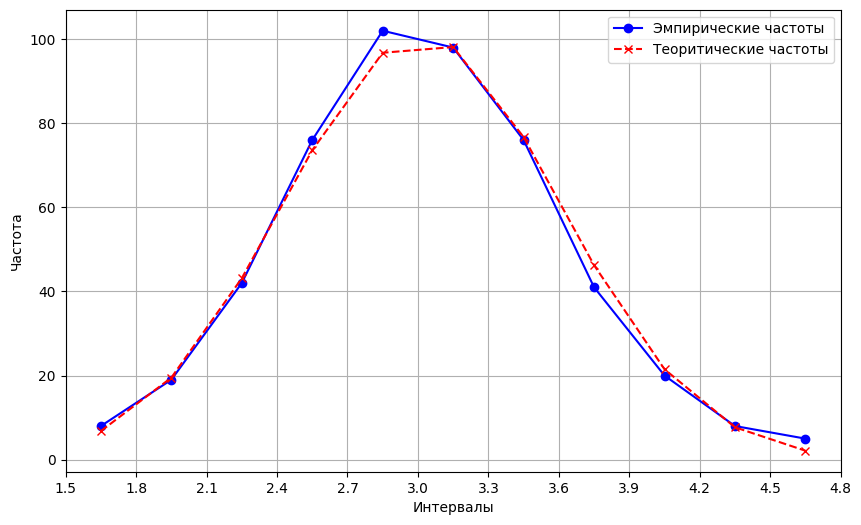

In [129]:
from scipy.stats import norm


# функция распределения * total_sum
def theoretical_frequency(start, end):
    return (norm.cdf(end, mean, std) - norm.cdf(start, mean, std)) * total_sum

# теоритические частоты
theoretical_frequencies = [
    theoretical_frequency(row["Начало интервала"], row["Конец интервала"])
    for _, row in df.iterrows()
]


chi_squared_stat = sum(
    (obs - exp) ** 2 / exp
    for obs, exp in zip(df["Количество"], theoretical_frequencies)
)


plt.figure(figsize=(10, 6))
plt.plot(df["Середина интервала"], df["Количество"], marker='o', color='b', label="Эмпирические частоты")
plt.plot(df["Середина интервала"], theoretical_frequencies, marker='x', color='r', linestyle='--', label="Теоритические частоты")

plt.xticks(marks)
plt.xlabel('Интервалы')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()

In [133]:
chi_squared_stat

5.217002785630393

In [125]:
chi2_critical = 15.5

chi_squared_stat < chi2_critical
# значит распределение генеральной совокупности можно считать нормальным

True